In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [2]:
df = pd.read_csv("train.csv")
df['datetime'] = pd.to_datetime(df['datetime'])

# Create required time-based columns
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.day_name()

# Map season values
season_map = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
df['season'] = df['season'].map(season_map)

# Create day period column
def day_period(hour):
    if 0 <= hour < 6:
        return 'night'
    elif 6 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'afternoon'
    else:
        return 'evening'

df['day_period'] = df['hour'].apply(day_period)

C:\Users\prath\AppData\Local\Temp\ipykernel_7260\3042857685.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetime'] = pd.to_datetime(df['datetime'])


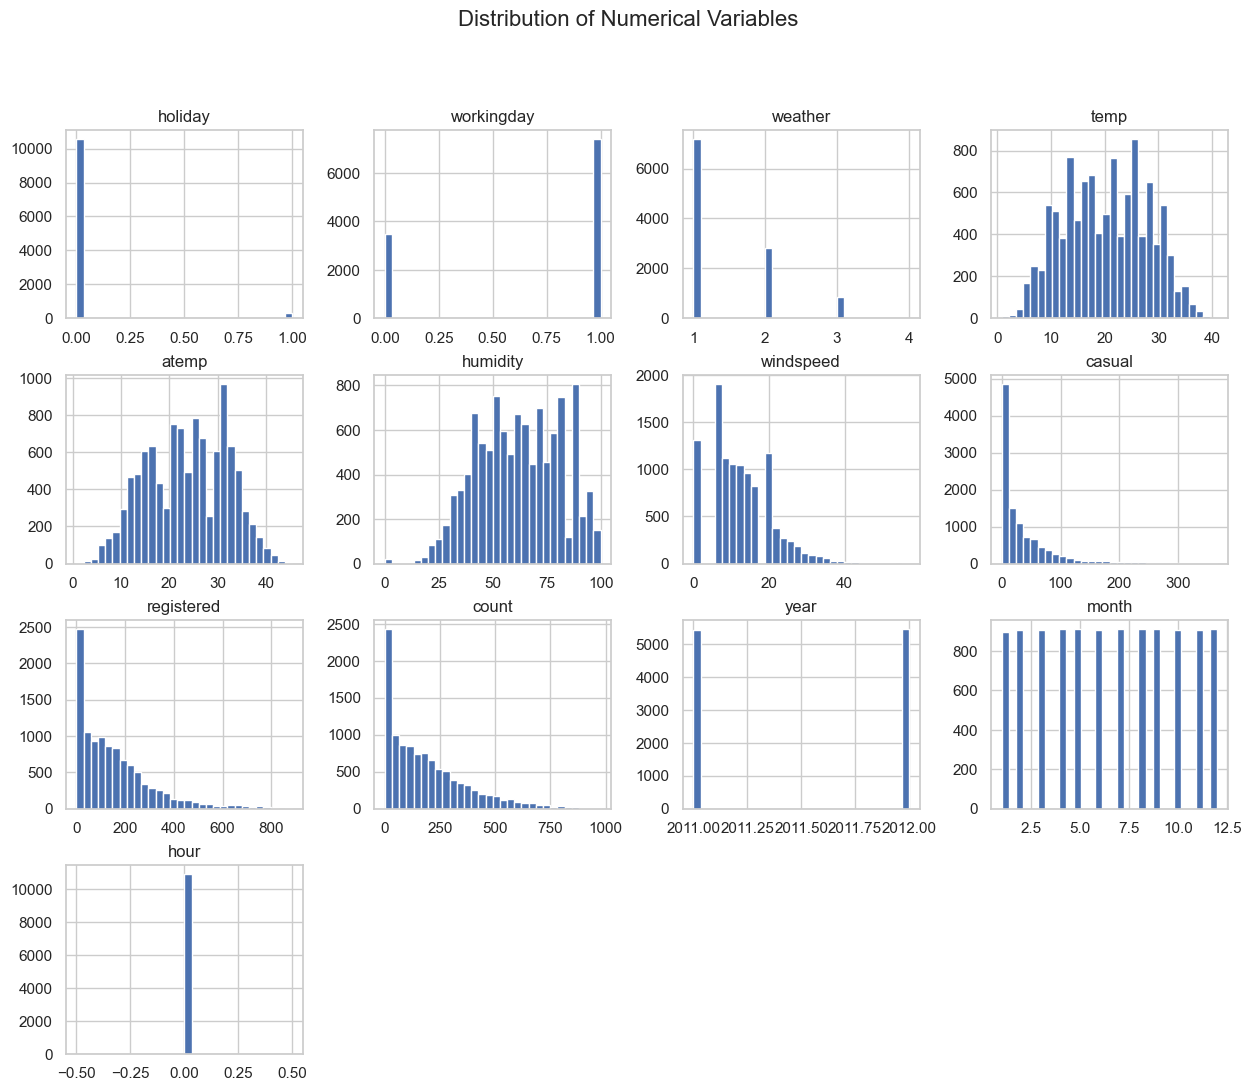

In [3]:
#Question 1. Plot the distributions of all the numerical columns in the dataset using histograms.

num_cols = df.select_dtypes(include=np.number).columns

df[num_cols].hist(figsize=(15, 12), bins=30)
plt.suptitle("Distribution of Numerical Variables", fontsize=16)
plt.show()

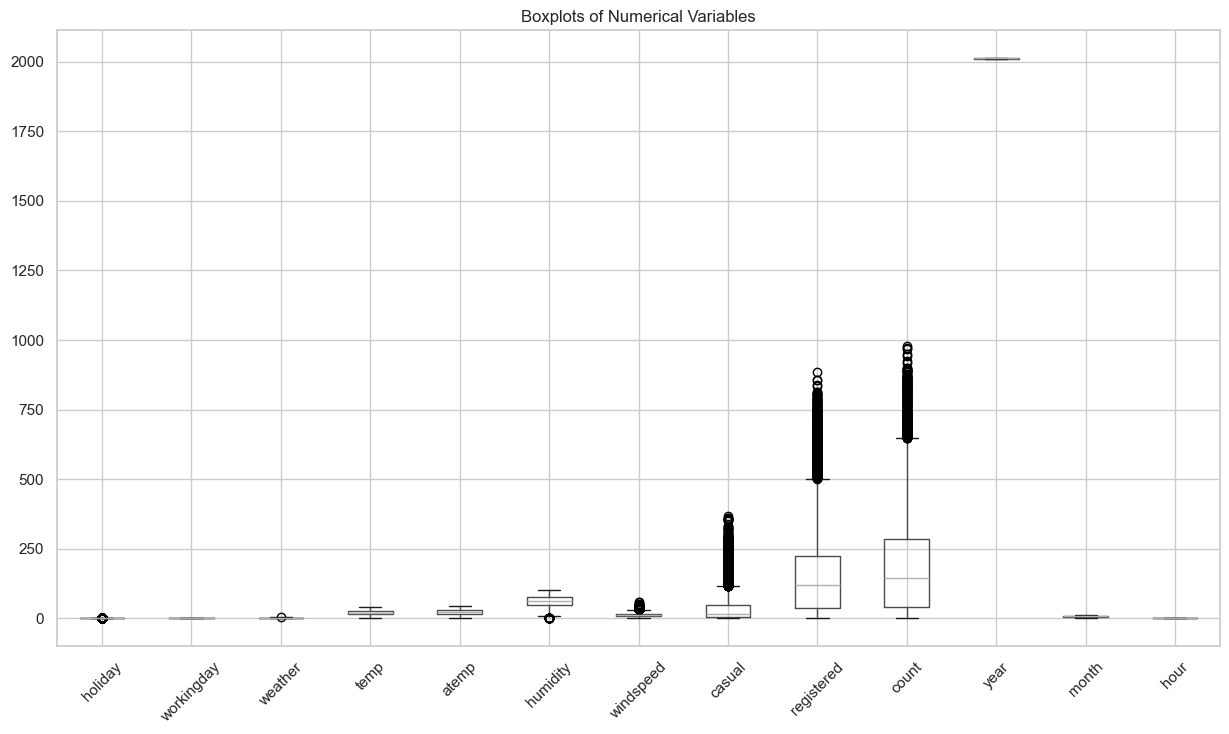

In [4]:
#Question 2. Plot the distributions of all the numerical columns in the dataset using box plots.

plt.figure(figsize=(15, 8))
df[num_cols].boxplot(rot=45)
plt.title("Boxplots of Numerical Variables")
plt.show()

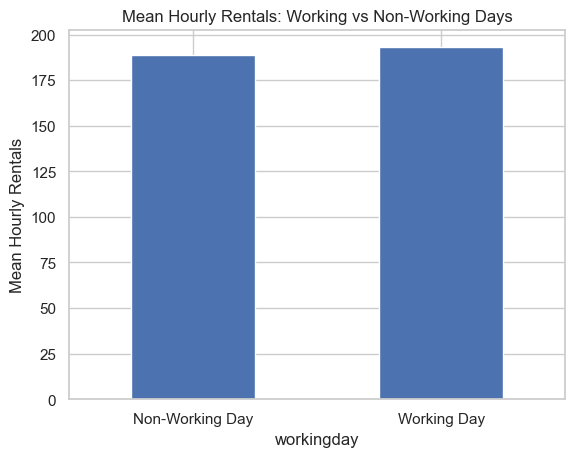

In [5]:
#Question 3. Plot the the mean of the hourly total rentals count for working and non-working days.

mean_work = df.groupby('workingday')['count'].mean()

mean_work.plot(kind='bar')
plt.xticks([0, 1], ['Non-Working Day', 'Working Day'], rotation=0)
plt.ylabel("Mean Hourly Rentals")
plt.title("Mean Hourly Rentals: Working vs Non-Working Days")
plt.show()

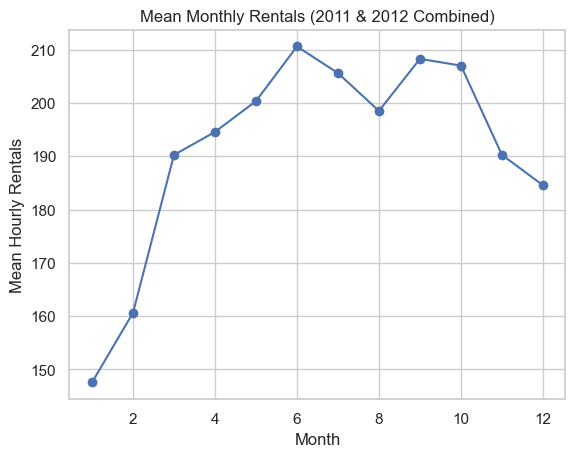

In [6]:
#Question 4. Plot the the mean of the hourly total rentals count for the different months for both years combined.

monthly_mean = df.groupby('month')['count'].mean()

monthly_mean.plot(marker='o')
plt.title("Mean Monthly Rentals (2011 & 2012 Combined)")
plt.xlabel("Month")
plt.ylabel("Mean Hourly Rentals")
plt.show()

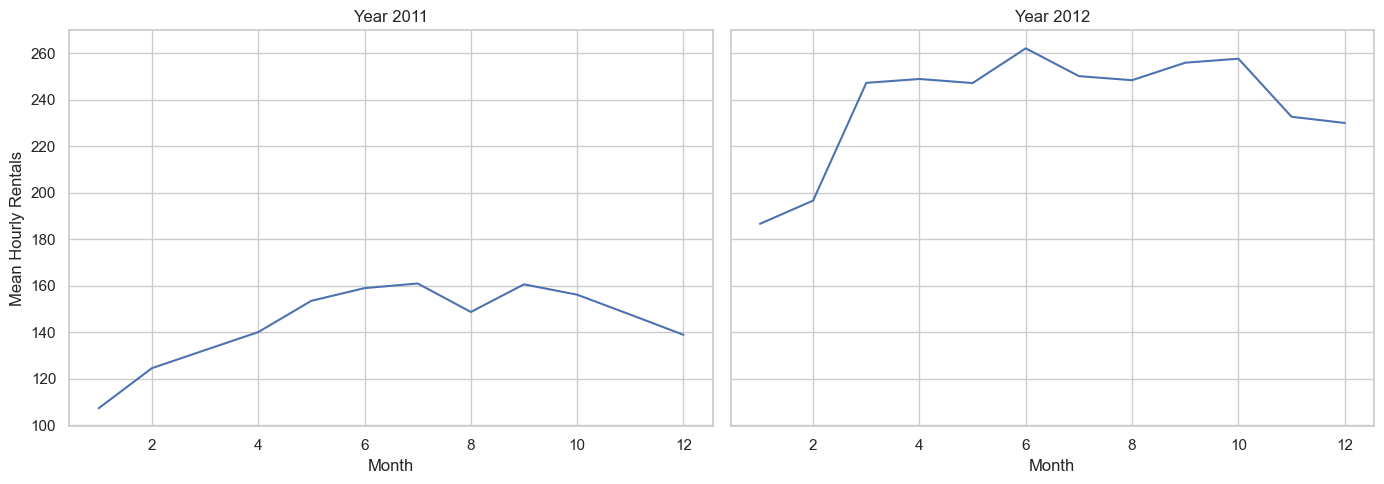

In [7]:
#Question 5. Plot the the mean of the hourly total rentals count for the different months for both years separately in a multi-panel figure.

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

for ax, year in zip(axes, [2011, 2012]):
    df[df['year'] == year].groupby('month')['count'].mean().plot(ax=ax)
    ax.set_title(f"Year {year}")
    ax.set_xlabel("Month")
    ax.set_ylabel("Mean Hourly Rentals")

plt.tight_layout()
plt.show()

C:\Users\prath\AppData\Local\Temp\ipykernel_7260\3336367638.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(data=df, x='weather', y='count', ci=95)


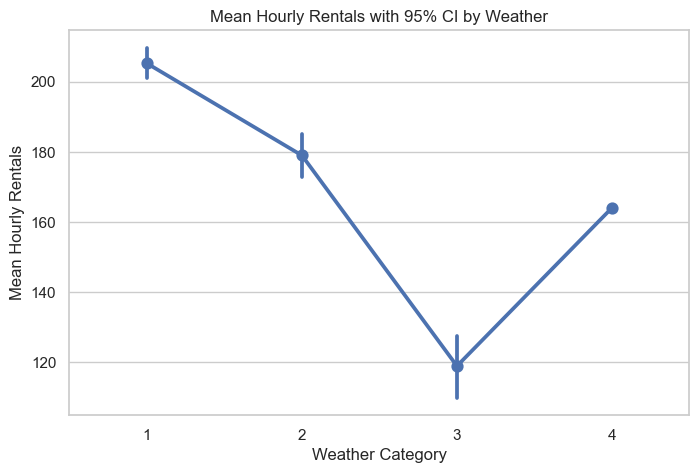

In [8]:
#Question 6. Plot the the mean and the 95% confidence interval of the hourly total rentals count for the four different weather categories. What can you observe ?

plt.figure(figsize=(8, 5))
sns.pointplot(data=df, x='weather', y='count', ci=95)
plt.title("Mean Hourly Rentals with 95% CI by Weather")
plt.xlabel("Weather Category")
plt.ylabel("Mean Hourly Rentals")
plt.show()

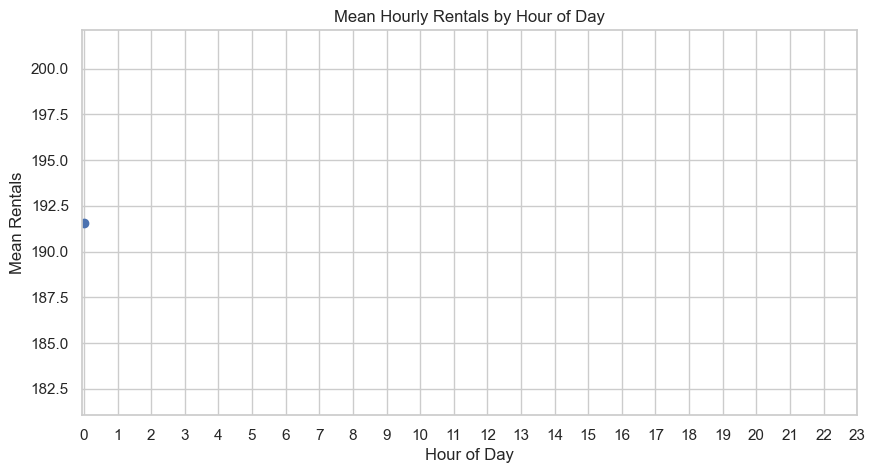

In [20]:
#Question 7. Plot the the mean of the hourly total rentals count versus the hour of the day. Which hours of the day have the highest rentals count ?

hourly_mean = df.groupby('hour')['count'].mean()

plt.figure(figsize=(10,5))
plt.plot(hourly_mean.index, hourly_mean.values, marker='o')
plt.xticks(range(0,24))
plt.xlabel("Hour of Day")
plt.ylabel("Mean Rentals")
plt.title("Mean Hourly Rentals by Hour of Day")
plt.grid(True)
plt.show()

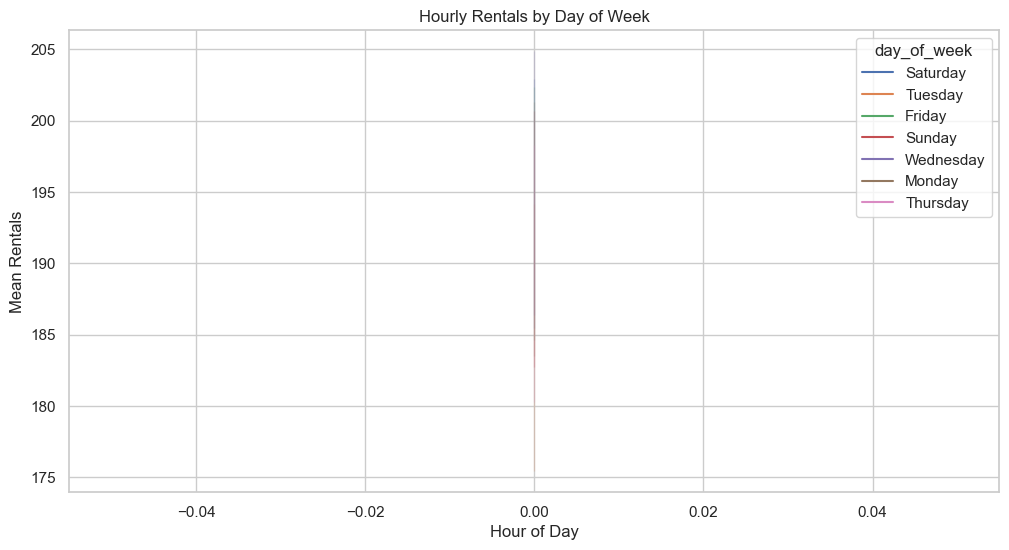

In [21]:
#Question 8. Repeat the plot in 7 for different days of the week. What patterns can you observe ?

plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='hour', y='count', hue='day_of_week')
plt.title("Hourly Rentals by Day of Week")
plt.xlabel("Hour of Day")
plt.ylabel("Mean Rentals")
plt.grid(True)
plt.show()

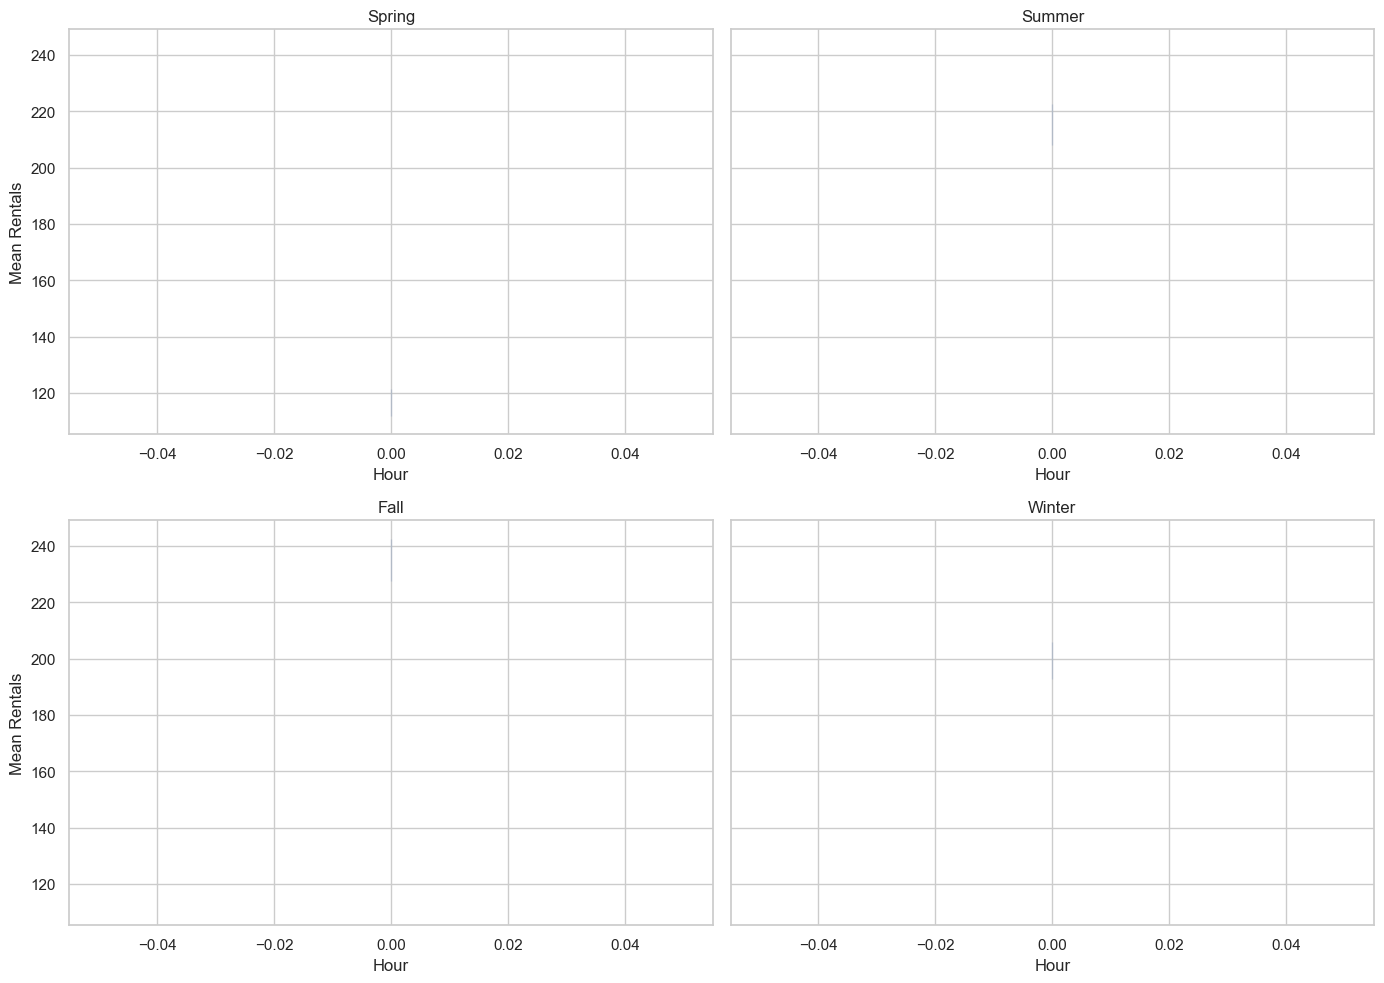

In [23]:
#Question 9. Repeat the plot in 8 for the four seasons using a multi-panel figure. What patterns can you observe ?

fig, axes = plt.subplots(2,2,figsize=(14,10), sharey=True)
for ax, season in zip(axes.flatten(), df['season'].unique()):
    sns.lineplot(
        data=df[df['season']==season],
        x='hour', y='count', ax=ax
    )
    ax.set_title(season.capitalize())
    ax.set_xlabel("Hour")
    ax.set_ylabel("Mean Rentals")
    ax.grid(True)
plt.tight_layout()
plt.show()

C:\Users\prath\AppData\Local\Temp\ipykernel_7260\1959256406.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(


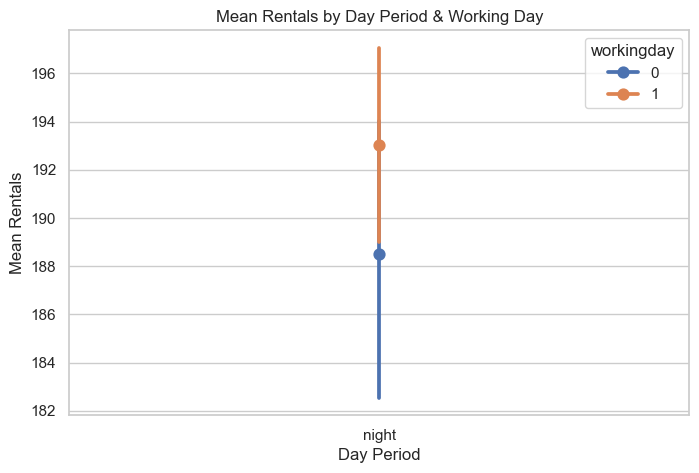

In [24]:
#Question 10. Plot the the mean  and the 95% confidence interval of the hourly total rentals count versus the period of the day column, which you created in the first part of the assignment. Which period of the day has the highest rentals count ? Does this peak period differ for working and non-working days ?

plt.figure(figsize=(8, 5))
sns.pointplot(
    data=df,
    x='day_period',
    y='count',
    hue='workingday',
    ci=95
)
plt.title("Mean Rentals by Day Period & Working Day")
plt.xlabel("Day Period")
plt.ylabel("Mean Rentals")
plt.show()

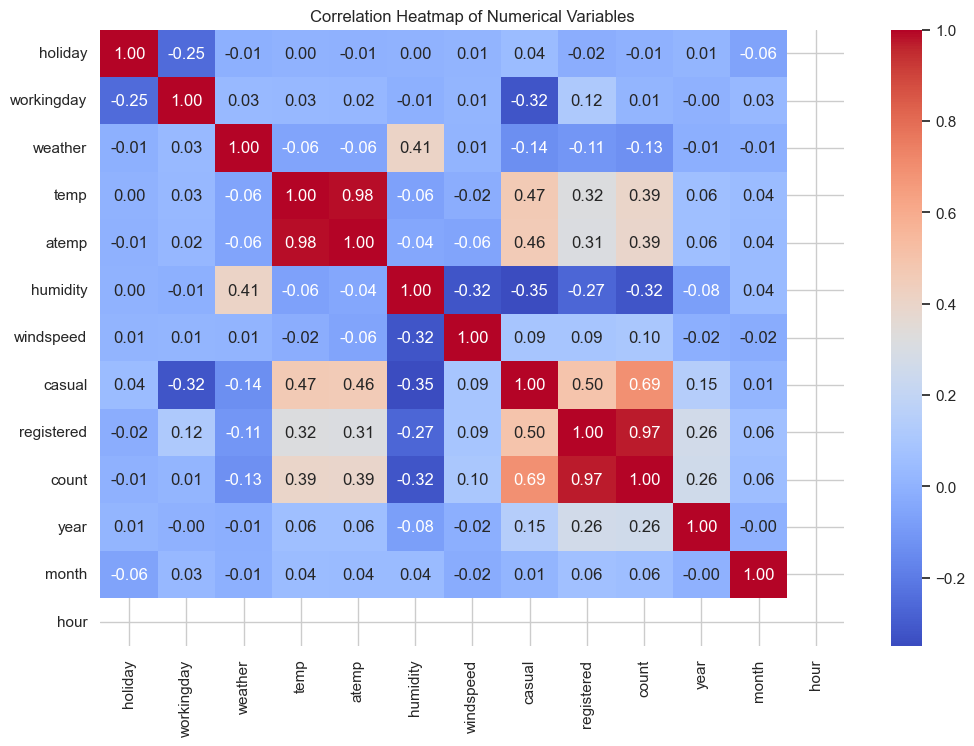

In [25]:
#Question 11. Plot a heatmap for the correlation matrix of the dataset numerical variables. What observations can you make ?

corr = df.select_dtypes(include=np.number).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()